In [2]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:100]
print(data.shape)
#(100L, 4L)
#一共有100个样本数据, 维度为4维

label = iris.target[:100]
print(label)

(100, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [3]:
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, label, random_state=0)

/usr/local/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
import xgboost as xgb
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x)

params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':1}

watchlist = [(dtrain,'train')]

In [13]:
bst = xgb.train(params,dtrain,num_boost_round=100,evals=watchlist)

ypred=bst.predict(dtest)

# 设置阈值, 输出一些评价指标
y_pred = (ypred >= 0.5)*1

from sklearn import metrics
print('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))
print('ACC: %.4f' % metrics.accuracy_score(test_y,y_pred))
print('Recall: %.4f' % metrics.recall_score(test_y,y_pred))
print('F1-score: %.4f' %metrics.f1_score(test_y,y_pred))
print('Precesion: %.4f' %metrics.precision_score(test_y,y_pred))
metrics.confusion_matrix(test_y,y_pred)

[0]	train-auc:1
[1]	train-auc:1
[2]	train-auc:1
[3]	train-auc:1
[4]	train-auc:1
[5]	train-auc:1
[6]	train-auc:1
[7]	train-auc:1
[8]	train-auc:1
[9]	train-auc:1
[10]	train-auc:1
[11]	train-auc:1
[12]	train-auc:1
[13]	train-auc:1
[14]	train-auc:1
[15]	train-auc:1
[16]	train-auc:1
[17]	train-auc:1
[18]	train-auc:1
[19]	train-auc:1
[20]	train-auc:1
[21]	train-auc:1
[22]	train-auc:1
[23]	train-auc:1
[24]	train-auc:1
[25]	train-auc:1
[26]	train-auc:1
[27]	train-auc:1
[28]	train-auc:1
[29]	train-auc:1
[30]	train-auc:1
[31]	train-auc:1
[32]	train-auc:1
[33]	train-auc:1
[34]	train-auc:1
[35]	train-auc:1
[36]	train-auc:1
[37]	train-auc:1
[38]	train-auc:1
[39]	train-auc:1
[40]	train-auc:1
[41]	train-auc:1
[42]	train-auc:1
[43]	train-auc:1
[44]	train-auc:1
[45]	train-auc:1
[46]	train-auc:1
[47]	train-auc:1
[48]	train-auc:1
[49]	train-auc:1
[50]	train-auc:1
[51]	train-auc:1
[52]	train-auc:1
[53]	train-auc:1
[54]	train-auc:1
[55]	train-auc:1
[56]	train-auc:1
[57]	train-auc:1
[58]	train-auc:1
[59]	tr

array([[13,  0],
       [ 0, 12]])

In [29]:
ypred = bst.predict(dtest)
print(ypred)
print(test_y)

[0.1986771 0.8025874 0.1986771 0.8025874 0.8025874 0.8025874 0.1986771
 0.8025874 0.8025874 0.8025874 0.8025874 0.8025874 0.8025874 0.1986771
 0.1986771 0.1986771 0.1986771 0.1986771 0.1986771 0.1986771 0.1986771
 0.8025874 0.1986771 0.8025874 0.1986771]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


In [30]:
ypred_leaf = bst.predict(dtest, pred_leaf=True)
ypred_leaf

array([[1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

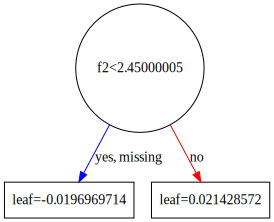

In [31]:
xgb.to_graphviz(bst, num_trees=0)

In [32]:
bst.dump_model("model.txt")

In [33]:
print(dir(bst))

['__class__', '__copy__', '__deepcopy__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_validate_features', 'attr', 'attributes', 'best_iteration', 'best_ntree_limit', 'boost', 'copy', 'dump_model', 'eval', 'eval_set', 'feature_names', 'feature_types', 'get_dump', 'get_fscore', 'get_score', 'get_split_value_histogram', 'handle', 'load_model', 'load_rabit_checkpoint', 'predict', 'save_model', 'save_rabit_checkpoint', 'save_raw', 'set_attr', 'set_param', 'update']


In [34]:
# 特征重要性
ypred_contribs = bst.predict(dtest, pred_contribs=True)
print(ypred_contribs)
print(len(ypred_contribs))

[[ 0.          0.         -1.1223897  -0.28784105  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.         -1.1223897  -0.28784105  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.         -1.1223897  -0.28784105  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.          1.0926375   0.29425964  0.01564738]
 [ 0.          0.         -1.1223897  -0.28784105  0.01564738]
 [ 0.          0.         -1.1223897  -0.28784105  0.01564738]
 [ 0.          0.         -1.1223897  -0.28784105  0.01

In [36]:
import numpy as np
# 第0个测试样本的得分
score_a = sum(ypred_contribs[0])
print(score_a)
# -1.38121373579
print(1/float(1+np.exp(-score_a)))

score_b = sum(ypred_contribs[1])
print(score_b)
# 1.41094945744

-1.394583348184824
0.19867705939550995
1.402544554322958
